In [6]:
from __future__ import print_function
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
from IPython.display import HTML, YouTubeVideo
import matplotlib.patches as patches
from matplotlib.lines import Line2D
# import ganymede
# ganymede.configure('uav.beaver.works')

/home/vboxuser/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Enter your name below and run the cell:

Individual cells can be run with `Ctrl` + `Enter`

James Xiao

In [ ]:
ganymede.name('YOUR NAME HERE')
def check(p):
    ganymede.update(p,True)
check(0)

https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression/v/squared-error-of-regression-line

*Note: All Khan Academy content is available for free at khanacademy.org*

In [ ]:
YouTubeVideo('6OvhLPS7rj4', width=560, height=315)

In [ ]:
YouTubeVideo('mIx2Oj5y9Q8', width=560, height=315)

In [ ]:
YouTubeVideo('f6OnoxctvUk', width=560, height=315)

In [ ]:
YouTubeVideo('u1HhUB3NP8g', width=560, height=315)

In [ ]:
YouTubeVideo('8RSTQl0bQuw', width=560, height=315)

In [ ]:
YouTubeVideo('GAmzwIkGFgE', width=560, height=315)

**The last video is optional**

In [ ]:
YouTubeVideo('ww_yT9ckPWw', width=560, height=315)

(215, 209)


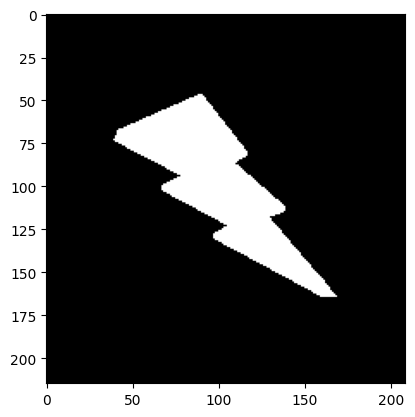

In [30]:
lightningbolt = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
_, lightningbolt = cv2.threshold(lightningbolt,150,255,cv2.THRESH_BINARY)
print(lightningbolt.shape)
fig,ax = plt.subplots()
ax.imshow(lightningbolt, cmap='gray');
# check(1)

In [ ]:
np.argwhere?

In [8]:
bolt = np.argwhere(lightningbolt)
bolt

array([[ 47,  88],
       [ 47,  89],
       [ 47,  90],
       ...,
       [164, 166],
       [164, 167],
       [164, 168]])

## Linear Regression

$$m = \frac{\bar{x}\bar{y} - \overline{xy}}{(\bar{x})^2 - \overline{x^2}}$$

$$b = \bar{y} - m\bar{x}$$

## Question: how can we extract the xs and ys separately from the result of argwhere?

Hint: review numpy slicing by columns and rows

In [9]:
# TODO
bolt[:,0]
bolt[:,1]

array([ 88,  89,  90, ..., 166, 167, 168])

## Question: Why would we want to convert x and y points from int values to floats?

In [10]:
# TODO
# to do easier calculations so they don't get casted to ints

In [31]:
def calculate_regression(points): # input is the result of np.argwhere
    # convert points to float
    points = points.astype(float) #TODO (see astype, https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html)
    
    xs = points[:,0] #TODO
    ys = points[:,1] #TODO
    x_mean = np.mean(xs) #TODO
    y_mean = np.mean(ys) #TODO

    xy_mean = np.mean(xs * ys) #TODO

    x_squared_mean = np.mean(np.square(xs)) #TODO

    m = (x_mean * y_mean - xy_mean) / ((x_mean)**2 - x_squared_mean)  #TODO
    
    b = y_mean - m * x_mean #TODO

    return (m,b)

The intercept we calculated, $b$, may be outside of the pixel space of the image, so we must find two points inside of pixel space, $(x_1, y_1)$ and $(x2, y2)$ which will allow us to plot our regression line on the image. It may be best to choose points on the regression line which also occur on the boundaries/extrema of the image.

In [33]:
def find_inliers(m, b, shape):
    height, width = shape

    y1, x1 = 0, m * 0 + b  # Point at the left edge of the image
    y2, x2 = width, m * width + b  # Point at the right edge of the image

    if y1 < 0:
        x1 = -b / m  # Adjust x1 to the bottom of the image
        y1 = 0
    elif y1 > height:
        x1 = (height - b) / m  # Adjust x1 to the top of the image
        y1 = height

    if y2 < 0:
        x2 = -b / m  # Adjust x2 to the bottom of the image
        y2 = 0
    elif y2 > height:
        x2 = (height - b) / m  # Adjust x2 to the top of the image
        y2 = height

    return (x1, y1, x2, y2)

(146, 125)


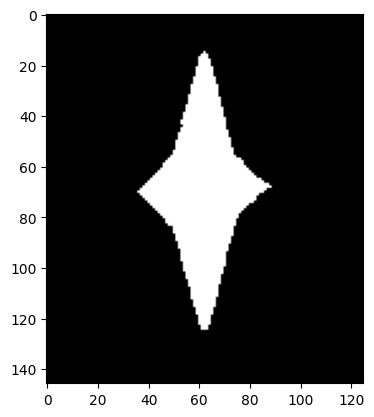

In [34]:
star = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
print(star.shape)

_, star = cv2.threshold(star,125,255,cv2.THRESH_BINARY)
fig,ax = plt.subplots()
ax.imshow(star, cmap='gray');

In [35]:
m,b = calculate_regression(np.argwhere(star))
_ = find_inliers(m,b, star.shape)

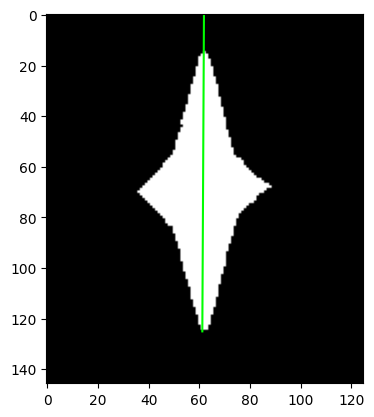

In [38]:
# below is an example of how to draw a random line from (10,25) to (10,55)
# TODO: replace this with the result of find_inliers
# -- pay attention to the directions of the x and y axes 
#    in image space, row-column space, and cartesian space
# Look at the help function for Line2D below

fig,ax = plt.subplots()
ax.imshow(star, cmap='gray');
regression = Line2D([_[0],_[2]],[_[1],_[3]], color='lime')
ax.add_line(regression);

In [37]:
Line2D?

Init signature:
Line2D(
    xdata,
    ydata,
    *,
    linewidth=None,
    linestyle=None,
    color=None,
    gapcolor=None,
    marker=None,
    markersize=None,
    markeredgewidth=None,
    markeredgecolor=None,
    markerfacecolor=None,
    markerfacecoloralt='none',
    fillstyle=None,
    antialiased=None,
    dash_capstyle=None,
    solid_capstyle=None,
    dash_joinstyle=None,
    solid_joinstyle=None,
    pickradius=5,
    drawstyle=None,
    markevery=None,
    **kwargs,
)
Docstring:     
A line - the line can have both a solid linestyle connecting all
the vertices, and a marker at each vertex.  Additionally, the
drawing of the solid line is influenced by the drawstyle, e.g., one
can create "stepped" lines in various styles.
Init docstring:
Create a `.Line2D` instance with *x* and *y* data in sequences of
*xdata*, *ydata*.

Additional keyword arguments are `.Line2D` properties:

Properties:
    agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi va

## TODO

1. Run your linear regression algorithm on the following images. 
2. Plot each of the results. 
3. Include each result in your submitted PDF.

In [43]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

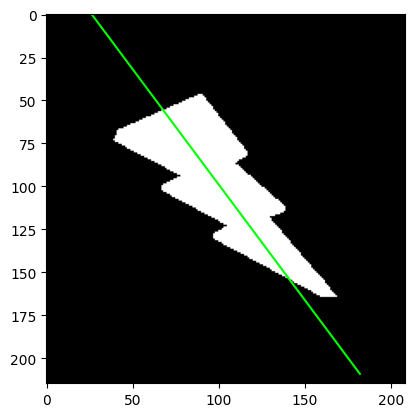

In [41]:
m,b = calculate_regression(np.argwhere(lightningbolt))
_ = find_inliers(m,b, lightningbolt.shape)
fig,ax = plt.subplots()
ax.imshow(lightningbolt, cmap='gray');
regression = Line2D([_[0],_[2]],[_[1],_[3]], color='lime')
ax.add_line(regression);

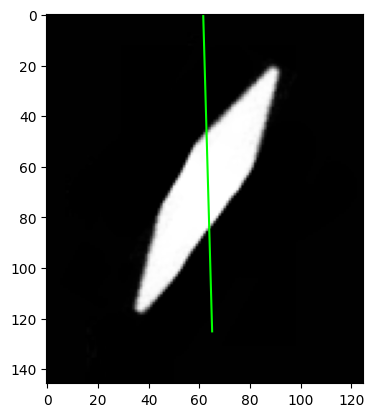

In [44]:
m,b = calculate_regression(np.argwhere(blob))
_ = find_inliers(m,b, blob.shape)
fig,ax = plt.subplots()
ax.imshow(blob, cmap='gray');
regression = Line2D([_[0],_[2]],[_[1],_[3]], color='lime')
ax.add_line(regression);

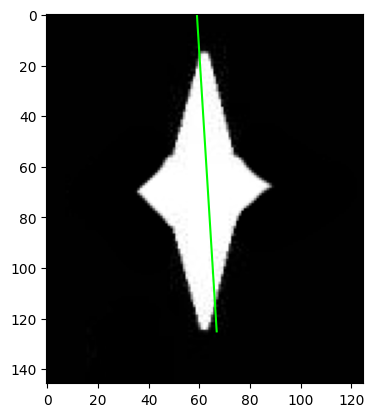

In [45]:
m,b = calculate_regression(np.argwhere(squishedstar))
_ = find_inliers(m,b, squishedstar.shape)
fig,ax = plt.subplots()
ax.imshow(squishedstar, cmap='gray');
regression = Line2D([_[0],_[2]],[_[1],_[3]], color='lime')
ax.add_line(regression);

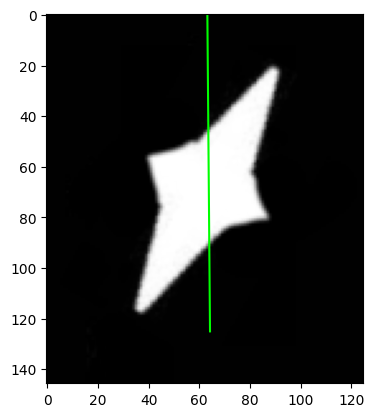

In [46]:
m,b = calculate_regression(np.argwhere(squishedturnedstar))
_ = find_inliers(m,b, squishedturnedstar.shape)
fig,ax = plt.subplots()
ax.imshow(squishedturnedstar, cmap='gray');
regression = Line2D([_[0],_[2]],[_[1],_[3]], color='lime')
ax.add_line(regression);

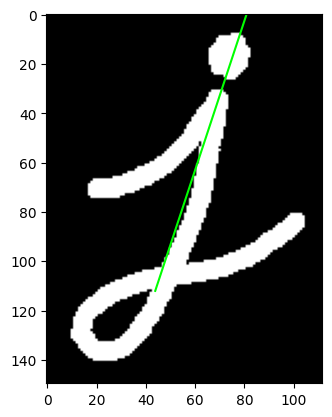

In [47]:
m,b = calculate_regression(np.argwhere(letterj))
_ = find_inliers(m,b, letterj.shape)
fig,ax = plt.subplots()
ax.imshow(letterj, cmap='gray');
regression = Line2D([_[0],_[2]],[_[1],_[3]], color='lime')
ax.add_line(regression);

## When you are done:

You should have six images with regression lines plotted on top of them.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 

## Stretch goal

*Implement a machine learning algorithm!*

**Ran**dom **Sa**mple **C**onsensus, commonly referred to as *RANSAC*, is one of the most widely used machine learning algorithms. In essence, it is a 'guess and check' algorithm. Take a small random sample of your data - two points in this case. Next, define a line through those two points. After doing so, count the number of *inliers*, or points closest to that line (euclidean distance is one way to do this).

https://en.wikipedia.org/wiki/Random_sample_consensus

Implement RANSAC for linear regression, and run it on all of your images.